In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
import random

In [ ]:
'''

    Sturm–Liouville task
    u'' + p(x) * u' + q(x) * u = phi(x)
    u(0) = u(l) = 0

    apply u' = w
    get system of ODEs:

    u' = w
    w' = -p(x) * w - q(x) * u + phi(x)

'''

In [59]:
l = 7

In [70]:
#p = lambda x: math.sin(x * math.pi / l)
p = lambda x: math.sin(x) * math.exp(-x)
q = lambda x: x ** 3
phi = lambda x: math.exp(x)

In [61]:
def ODEs(y, x, p, q, phi):
    u, w = y
    dydt = [w, -p(x) * w - q(x) * u + phi(x)]
    return dydt

In [62]:
y0 = [0.0, -13.627058659262445]
X = np.linspace(0, l, 101)
sol = odeint(ODEs, y0, X, args=(p, q, phi))


In [63]:
sol[-1][0]

-1.6001954092903503e-06

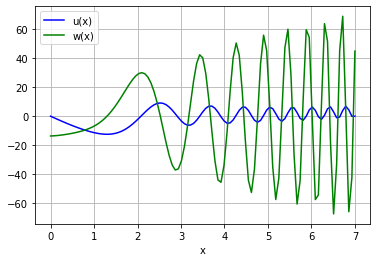

In [64]:
plt.plot(X, sol[:, 0], 'b', label='u(x)')
plt.plot(X, sol[:, 1], 'g', label='w(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

In [65]:
def res(ODEs, a, b, n, p, q, phi, optimization_parameter):
    print(optimization_parameter)
    y0 = [0.0, optimization_parameter]
    X = np.linspace(a, b, n)
    sol = odeint(ODEs, y0, X, args=(p, q, phi))
    plt.plot(X, sol[:, 0], label='u(x)', linewidth=1.5)
    return sol[-1][0]


In [118]:
def SecantRootFinder(f, z0 : complex, eps=10e-4, maxIterations=1000):
    z = z0
    z_prev = z0 + 2 * eps
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(fz) < eps:
            return z
        z, z_prev = z - fz / (fz - f(z_prev)) * (z - z_prev), z
    return None

10
10.002
-13.626727600270176
-13.626727600270176


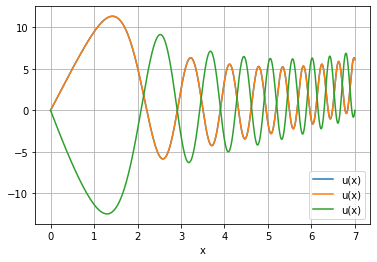

In [71]:
print(SecantRootFinder(lambda opt: res(ODEs, 0, l, 1001, p, q, phi, opt), 10, eps=10e-4))
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

In [ ]:
'''

    ищем с помощью прямой
    прямую определяем по двум "выстрелам"
    находим b1 и b2 случайно в общем-то
    запускаем решение для них, получаем u1 и u2
    таким образом есть СЛАУ
    u1 = A * b1 + B
    u2 = A * b2 + B
    отсюда легко вывести
    A = (u1 - u2) / (b1 - b2)
    B = u1 - b1 * (u1 - u2) / (b1 - b2)
    тогда мы знаем прямую, можем решить уравнение
    u = 0 = A * b + B
    получаем
    b = - B / A = b1 - u1 * (b1 - b2) / (u1 - u2)

'''

2
6
-13.627044058032759


2.926245036283248e-06

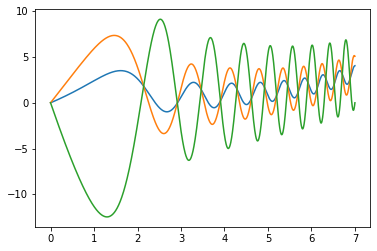

In [117]:
optF = lambda opt: res(ODEs, 0, l, 1001, p, q, phi, opt)
b1 = random.randrange(0, l)
b2 = random.randrange(0, l)
u1 = optF(b1)
u2 = optF(b2)
b = b1 - u1 * (b1 - b2) / (u1 - u2)
optF(b)

In [25]:
def ComplexSecantRootFinder(f, z0 : complex, eps=10e-4, maxIterations=1000):
    z = z0
    z_prev = z0 + 2 * eps
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(z - z_prev) < eps:
            return z
        z, z_prev = z - fz / (fz - f(z_prev)) * (z - z_prev), z
    return None

In [ ]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4):
    if Df is None: Df = lambda z: (f(z+eps) - f(z-eps)) / (2 * eps)
    z = z0
    z_prev = z0 - 2 * eps
    while np.abs(z - z_prev) > eps:
        z_prev = z
        z = z - f(z)/Df(z)
    return z

In [23]:
ComplexSecantRootFinder(lambda x: 1, 1)

ZeroDivisionError: division by zero

In [28]:
ComplexSecantRootFinder(lambda x: x**3+1, 0.1)

0.09811144603816319